In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Loading data

In [2]:
df_pro_contacts_adults = pd.read_csv("pro_contacts_adults.csv", index_col=0)
df_pro_contacts_children = pd.read_csv("pro_contacts_children.csv", index_col=0)
df_households = pd.read_csv("households.csv", index_col=0)


#infos
print(df_households.sum())
#df_households.describe()
#df_pro_contacts_children.describe()
#df_pro_contacts_adults.describe()




nb_children                                                 3085
nb_adults                                                   6960
type           two_parent_familytwo_parent_familytwo_parent_f...
size                                                       10045
dtype: object


# Initializing the graph

We start by defining the classes whose instances will be the nodes of our graph

In [3]:
class Person():
    def __init__(self, person_id, state, age):
        self.person_id = person_id
        self.age = age
        self.state = state
    def info(self):
        infos = "{} {} {}".format(self.age,self.person_id, self.state)
    
    def __str__(self):
        s = "Person #{}".format(self.person_id)
        return(s)
    
    def __repr__(self):
        s = "Person #{}".format(self.person_id)
        return(s)

class Adult(Person):
    def __init__(self, person_id, state, job_cat, pro_contacts, company_id):
        super().__init__(person_id, state, "adult")
        self.job_cat = job_cat
        self.pro_contacts = pro_contacts
        self.company_id = company_id
    def info(self):
        infos = "{} {} {}".format(self.age,self.person_id, self.state)

class Child(Person):
    def __init__(self, person_id, state, school_contacts, school_id):
        super().__init__(person_id, state, "child")
        self.job_cat = job_cat
        self.school_contacts = school_contacts
        self.school_id = school_id
    def info(self):
        infos = "{} {} {}".format(self.age,self.person_id, self.state)

We create an empty graph into which we add nodes from the pro_contacts dataframes.

In [4]:
G = nx.Graph()
people = [] # we'll store Person objects here too in order to be able to access them quickly with person_id

for i, row in df_pro_contacts_adults.iterrows(): #We add adults to the nodes
    person_id = row.adult_id
    state = "S"
    job_cat = row.job_cat
    pro_contacts = row.pro_contacts
    company_id = row.company_id
    
    adult_node = Adult(person_id, state, job_cat, pro_contacts, company_id)
    G.add_node(adult_node)
    people.append(adult_node)
    
for i, row in df_pro_contacts_children.iterrows(): #We add childrens to the nodes
    person_id = row.child_id
    state = "S"
    school_contacts = row.school_contacts
    school_id = row.school_id
    
    child_node = Child(person_id, state, school_contacts, school_id)
    G.add_node(child_node)
    people.append(child_node)

    #print(G.nodes())
    


# Creating cliques for households

In [5]:
n_households = max(max(df_pro_contacts_children.index), max(df_pro_contacts_adults.index))
for id_household in range(n_households):
    df_household_adults = df_pro_contacts_adults.loc[df_pro_contacts_adults.index == id_household]
    household_adults = df_household_adults.adult_id
    
    df_household_children = df_pro_contacts_children.loc[df_pro_contacts_children.index == id_household]
    household_children = df_household_children.child_id
    
    household_people_ids = list(household_children) + list(household_adults)
    for edge in combinations(household_people_ids, 2):
        a = people[edge[0]]
        b = people[edge[1]]
        G.add_edge(a, b)
        G[a][b]["type"] = "household"
        G[a][b]["id"] = id_household
        



In [6]:
if (False):
    #pos = nx.spring_layout(G, iterations=20)
    nx.draw_networkx_nodes(G,pos,node_size=30 ,alpha =0.3)
    nx.draw_networkx_edges(G, pos)
    

# Creating cliques for companies

In [7]:
n_companies = int(max(df_pro_contacts_adults.company_id))
for company_id in range(n_companies):
    df_company = df_pro_contacts_adults.loc[df_pro_contacts_adults.company_id == company_id]
    company_employees_ids = list(df_company.adult_id)
    
    for edge in combinations(company_employees_ids, 2):
        a = people[edge[0]]
        b = people[edge[1]]
        G.add_edge(a, b)
        G[a][b]["type"] = "company"
        G[a][b]["id"] = company_id

In [8]:
df_company

adult_id         job_cat  pro_contacts  company_id
household_id                                                    
1087              2699  Services_other          1317       250.0
1619              4024  Services_other           201       250.0
2458              5009  Services_other           714       250.0

In [9]:
#calcule la position des nodes pour afficher le graph 
# /!\ très lent /!\
pos = nx.spring_layout(G, iterations=1)




C:\Users\nicol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\nicol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


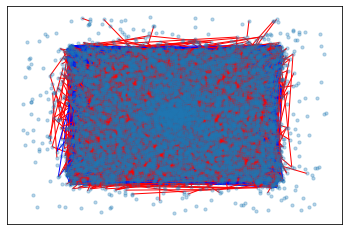

In [10]:
edge_color = []
for edge in G.edges():
    #print(edge)
    edge = G[edge[0]][edge[1]]
    if edge["type"] == "company":
        edge_color.append("b")
    if edge["type"] == "household":
        edge_color.append("r")
    

nx.draw_networkx_nodes(G,pos,node_size=10 ,alpha =0.3)
nx.draw_networkx_edges(G, pos,edge_color = edge_color)

# Adding links for pro life outside the company

In [11]:
for i, row in df_pro_contacts_adults.iterrows():
    adult_id = row.adult_id
    job_cat = row.job_cat
    pro_contacts = row.pro_contacts
    company_id = row.company_id
    
    company_employees_ids = list(df_pro_contacts_adults.loc[(df_pro_contacts_adults.company_id == company_id) &\
                                                            (df_pro_contacts_adults.adult_id != adult_id)].adult_id)

    #TO DO
        
for i, row in df_pro_contacts_children.iterrows():
    child_id = row.child_id
    school_contacts = row.school_contacts
    school_id = row.school_id
    
#     scool_pupils_ids = list(df_pro_contacts_children.loc[(df_pro_contacts_children.school_id == school_id) & (df_pro_contacts_adults.adult_id != adult_id)].adult_id)
    # TO DO

In [12]:
df_pro_contacts_adults.loc[(df_pro_contacts_adults.company_id == company_id)]

adult_id         job_cat  pro_contacts  company_id
household_id                                                    
506               1245     Shops_other             9       101.0
745               1829  Services_other           998       101.0
1844              4395     Shops_other             4       101.0
3775              6933     Shops_other            13       101.0
3801              6959  Services_other           870       101.0

In [13]:
pro_contacts

870

# Exporting the graph for visualization with Gephi

In [14]:
nx.write_gexf(G, "test.gexf")

# Modeling Coronavirus behaviour without any action taken

In [79]:
"""model 1 SIR with permanent recovery nobody change their habits"""
import random 

class Basic_SIR_Model():
    
    def __init__(self,G):
        import random
        self.G = G # This model's graph
        
        self.states =["S" #sane
                ,"I" #infected
                ,"D" #dead
                ,"R"] #recovered
        
        #TODO remplacer tout ça par des vrais valeur 
        #infetion probabilyties are for each interactions everydays 
        #death and recovery proba are for one day
        
        self.infection_probas=dict() #probability of infection dependeing on the type of the interaction
        self.infection_probas['company']= 0.07
        self.infection_probas["household"]= 0.12 # je les ai choisis au feeling il faudra regarder des valeurs plus précises

        self.death_proba=dict()
        self.death_proba["adult"]= 0.01
        self.death_proba["child"]= 0.001

        self.recovery_proba=dict()
        self.recovery_proba["adult"]= 0.05
        self.recovery_proba["child"]= 0.09

        #TODO add a self.data = dict to get statistics 

    def initialize_patients_zero(self, number_of_first_cases = 1):
        for node in list(self.G.nodes()): # everybody is sane at the begining 
            node.state = "S"
        print('first infected are:') 
        for random_pick in random.sample(list(self.G.nodes()), number_of_first_cases): 
            print(random_pick)
            random_pick.state = "I"

    def interaction(self,interaction_type): # return true if there is an infection
        return ( random.random()<=infection_probas[interaction_type])

    def sickness_evolution(self,age): # return state of the infected at the end of the day
        r = random.random()
        if r <= death_proba[age]:
            return "D"
        if r<= recovery_proba[age]:
            return "R"
        else:
            return "I"

    def one_day_passes(self): #update all the graph 
        print("today everybody went to work as usual.")
        changing_state = dict()
        for state in self.states:
            changing_state[state]= []

        for node in list(self.G.nodes()):
            if node.state == "I":  
                #we try each possible infection
                for neig in self.G[node]: 
                    if neig.state == "S":
                        t = self.G[node][neig]['type']
                        if self.interaction(t):
                            changing_state["I"].append(neig) #new infected :'(         
                #we check if the condition of the sick change (death recovery or no change)
                new_state = self.sickness_evolution(node.age) 
                if new_state != node.state : 
                    changing_state[new_state].append(node)                    

        for state in self.states: #update all the nodes states at once after all the interactions
            for node in changing_state[state]:
                node.state = state

            #basic visualisation    kinda bad
            total =len([nd for nd in list(self.G.nodes) if nd.state == state ])
            print(state,' Total ',total, ' new',len(changing_state[state])," today") 
    
    def basic_scenario(self): 
        self.initialize_patients_zero(number_of_first_cases=5)
        for i in range(365):
            self.one_day_passes()


In [80]:
#We put 5 infected in a untouched country which take no counter-mesure for a year
m = Basic_SIR_Model(G)
m.basic_scenario()

first infected are:
Person #4993
Person #3978
Person #9474
Person #4748
Person #7015
today everybody went to work as usual.
S  Total  10040  new 0  today
I  Total  8  new 3  today
D  Total  1  new 1  today
R  Total  1  new 1  today
today everybody went to work as usual.
S  Total  10037  new 0  today
I  Total  10  new 4  today
D  Total  1  new 0  today
R  Total  1  new 0  today
today everybody went to work as usual.
S  Total  10033  new 0  today
I  Total  19  new 10  today
D  Total  1  new 0  today
R  Total  1  new 0  today
today everybody went to work as usual.
S  Total  10024  new 0  today
I  Total  32  new 15  today
D  Total  1  new 0  today
R  Total  1  new 0  today
today everybody went to work as usual.
S  Total  10011  new 0  today
I  Total  46  new 18  today
D  Total  1  new 0  today
R  Total  4  new 3  today
today everybody went to work as usual.
S  Total  9997  new 0  today
I  Total  70  new 30  today
D  Total  1  new 0  today
R  Total  6  new 2  today
today everybody went to w

D  Total  1108  new 8  today
R  Total  6458  new 25  today
today everybody went to work as usual.
S  Total  1946  new 0  today
I  Total  533  new 0  today
D  Total  1112  new 4  today
R  Total  6473  new 15  today
today everybody went to work as usual.
S  Total  1946  new 0  today
I  Total  514  new 0  today
D  Total  1118  new 6  today
R  Total  6493  new 20  today
today everybody went to work as usual.
S  Total  1946  new 0  today
I  Total  488  new 0  today
D  Total  1120  new 2  today
R  Total  6513  new 20  today
today everybody went to work as usual.
S  Total  1946  new 0  today
I  Total  467  new 1  today
D  Total  1122  new 2  today
R  Total  6535  new 22  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  443  new 0  today
D  Total  1126  new 4  today
R  Total  6562  new 27  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  412  new 0  today
D  Total  1126  new 0  today
R  Total  6580  new 18  today
today every

S  Total  1945  new 0  today
I  Total  11  new 0  today
D  Total  1202  new 0  today
R  Total  6887  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  11  new 0  today
D  Total  1202  new 0  today
R  Total  6887  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  11  new 0  today
D  Total  1202  new 0  today
R  Total  6887  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  11  new 0  today
D  Total  1202  new 0  today
R  Total  6887  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  11  new 0  today
D  Total  1202  new 0  today
R  Total  6890  new 3  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  8  new 0  today
D  Total  1202  new 0  today
R  Total  6890  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  8  new 0  today
D  Total  1202  new 0  today

D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work a

I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
today everybody went to work as usual.
S  Total  1945  new 0  today
I  Total  0  new 0  today
D  Total  1203  new 0  today
R  Total  6897  new 0  today
toda

## Basic counter-mesure

first I try something very basic and cruel: killing every infected I find. 
I suppose that the state take action once 200 people are infected. (time to discover there existence)
I suppose they can test everybody but with a technology that is not very reliable 0.3 chance to discover the virus and no false positive.
The results are not great at all, the virus still spreads but is now indirectly way worst

In [81]:
# we try to kill every infected once we discover them
class North_Korea(Basic_SIR_Model):
    def __init__(self,G):
        super().__init__(G)
        self.execution_proba = 0.3 #chance to be caught and executed if you are sick during a search
    
    def search(self):
        nb_killed = 0
        for node in list(self.G.nodes()):
            if(node.state == "I"): 
                r = random.random()
                if r < self.execution_proba: #we try to kill the infected quickly
                    node.state = "D"
                    nb_killed +=1
        print(nb_killed," killed during search")
    
    def basic_scenario(self): 
        self.initialize_patients_zero(number_of_first_cases=5)
        for i in range(365):
            self.one_day_passes()
            nb_infected = len([nd for nd in list(self.G.nodes) if nd.state == "I" ])   
            if nb_infected > 200 :
                m.search()
m = North_Korea(G)
m.basic_scenario()
"""m = North_Korea(G)
m.initialize_patients_zero(number_of_first_cases=5)
for i in range(365):
    m.one_day_passes()
    
    nb_infected = len([nd for nd in list(m.G.nodes) if nd.state == "I" ])   
    if nb_infected > 200 :
        m.search()
"""    

        
        

first infected are:
Person #7398
Person #480
Person #5274
Person #2404
Person #7100
today everybody went to work as usual.
S  Total  10040  new 0  today
I  Total  13  new 8  today
D  Total  0  new 0  today
R  Total  0  new 0  today
today everybody went to work as usual.
S  Total  10032  new 0  today
I  Total  45  new 33  today
D  Total  0  new 0  today
R  Total  2  new 2  today
today everybody went to work as usual.
S  Total  10000  new 0  today
I  Total  175  new 174  today
D  Total  2  new 2  today
R  Total  4  new 2  today
today everybody went to work as usual.
S  Total  9868  new 0  today
I  Total  340  new 431  today
D  Total  3  new 1  today
R  Total  16  new 12  today
94  killed during search
today everybody went to work as usual.
S  Total  9699  new 0  today
I  Total  451  new 365  today
D  Total  99  new 2  today
R  Total  24  new 8  today
116  killed during search
today everybody went to work as usual.
S  Total  9481  new 0  today
I  Total  626  new 451  today
D  Total  217  

D  Total  4436  new 4  today
R  Total  740  new 7  today
today everybody went to work as usual.
S  Total  4751  new 0  today
I  Total  123  new 5  today
D  Total  4436  new 0  today
R  Total  742  new 2  today
today everybody went to work as usual.
S  Total  4746  new 0  today
I  Total  121  new 0  today
D  Total  4437  new 1  today
R  Total  747  new 5  today
today everybody went to work as usual.
S  Total  4746  new 0  today
I  Total  115  new 0  today
D  Total  4441  new 4  today
R  Total  750  new 3  today
today everybody went to work as usual.
S  Total  4746  new 0  today
I  Total  109  new 1  today
D  Total  4443  new 2  today
R  Total  759  new 9  today
today everybody went to work as usual.
S  Total  4745  new 0  today
I  Total  98  new 0  today
D  Total  4443  new 0  today
R  Total  763  new 4  today
today everybody went to work as usual.
S  Total  4745  new 0  today
I  Total  95  new 1  today
D  Total  4444  new 1  today
R  Total  771  new 8  today
today everybody went to wor

D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual

R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  toda

S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  861  new 0  today
today everybody went to work as usual.
S  Total  4731  new 0  today
I  Total  0  new 0  today
D  Total  4453  new 0  today
R  Total  

'm = North_Korea(G)\nm.initialize_patients_zero(number_of_first_cases=5)\nfor i in range(365):\n    m.one_day_passes()\n    \n    nb_infected = len([nd for nd in list(m.G.nodes) if nd.state == "I" ])   \n    if nb_infected > 200 :\n        m.search()\n'